✅ Cargando datos desde: WineQT.csv


=== INFORMACIÓN GENERAL DEL DATASET ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 K

C:\Users\TOKO\AppData\Local\Temp\ipykernel_24760\1269229462.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='quality', palette='viridis')


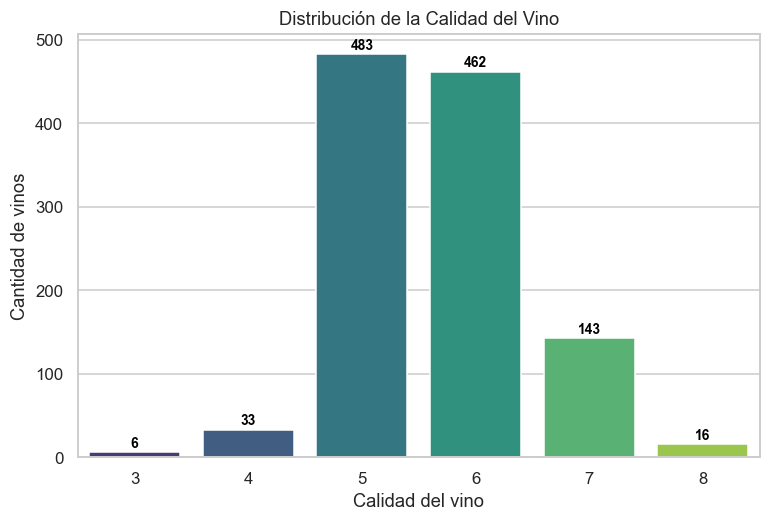

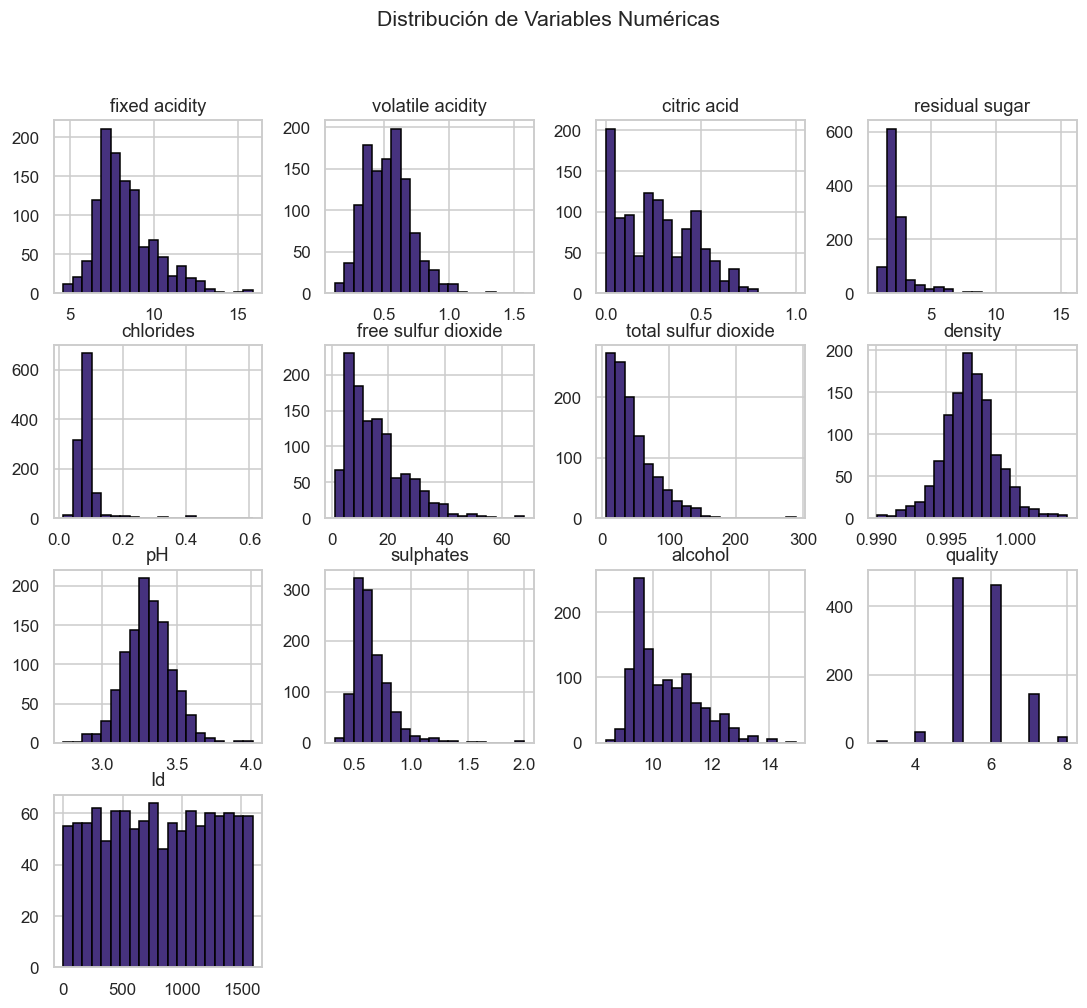

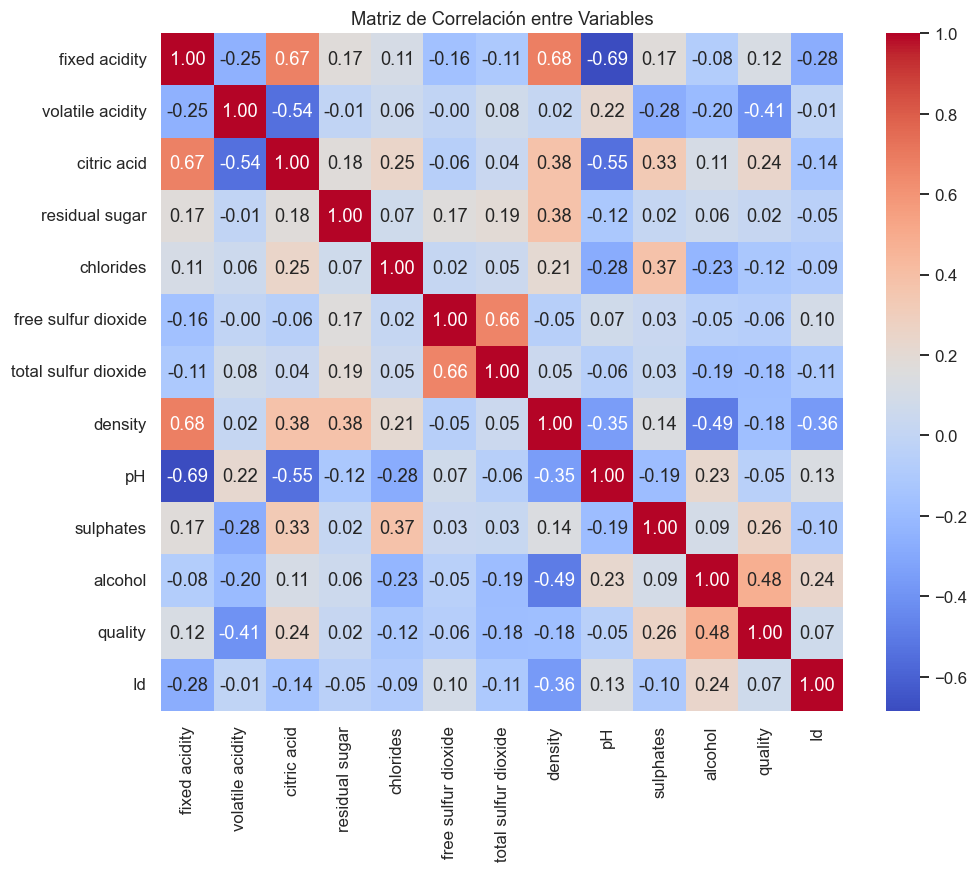

C:\Users\TOKO\AppData\Local\Temp\ipykernel_24760\1269229462.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='quality', y='alcohol', palette='mako')


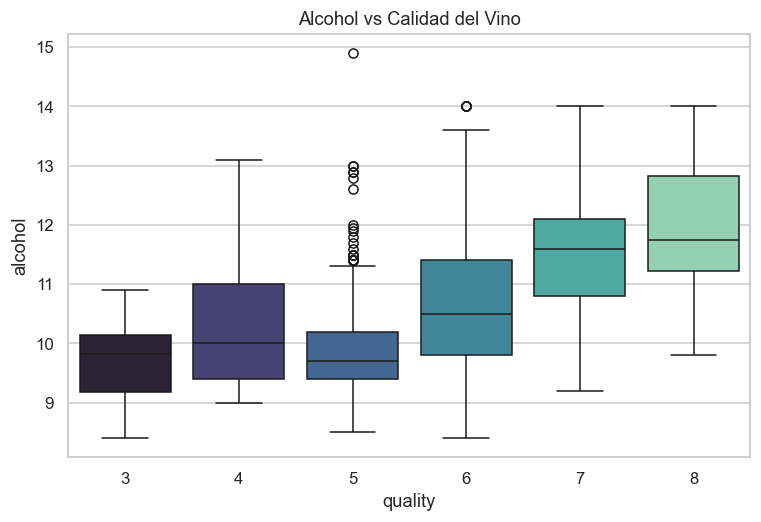

C:\Users\TOKO\AppData\Local\Temp\ipykernel_24760\1269229462.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='quality', y='volatile acidity', palette='rocket')


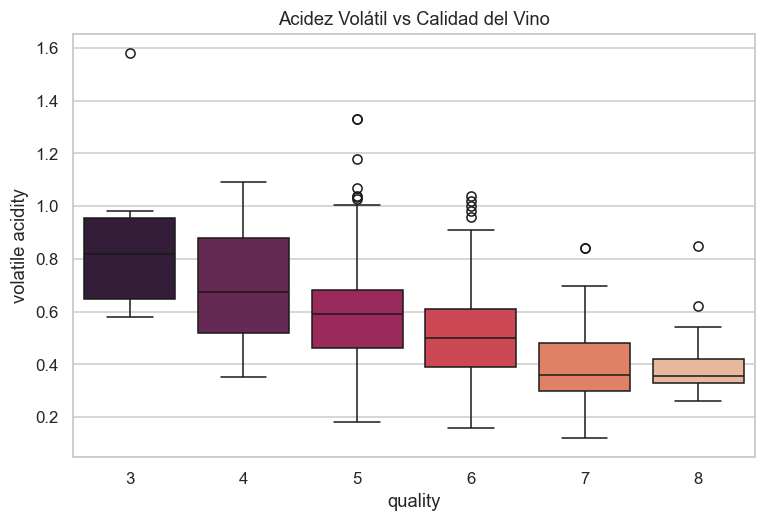


Dataset balanceado:
 quality
3    483
4    483
5    483
6    483
7    483
8    483
Name: count, dtype: int64


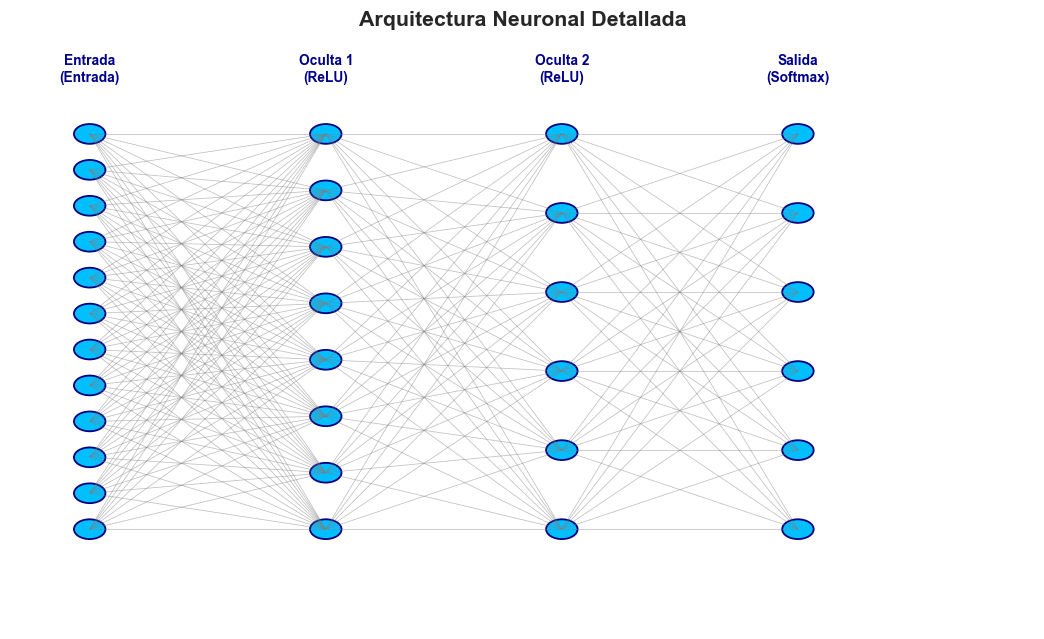


🧩 Entrenando ensemble de 5 redes neuronales...

🧠 Entrenando red neuronal 1/5
Época 40/400 – Pérdida 0.4730 – Exactitud 0.8276
Época 80/400 – Pérdida 0.3770 – Exactitud 0.8621
Época 120/400 – Pérdida 0.3195 – Exactitud 0.8879
Época 160/400 – Pérdida 0.3122 – Exactitud 0.8914
Época 200/400 – Pérdida 0.2940 – Exactitud 0.8966
Época 240/400 – Pérdida 0.2970 – Exactitud 0.8983
Época 280/400 – Pérdida 0.2899 – Exactitud 0.9034
⏹️ Early stopping en época 307
🧠 Entrenando red neuronal 2/5
Época 40/400 – Pérdida 0.4871 – Exactitud 0.8241
Época 80/400 – Pérdida 0.3861 – Exactitud 0.8603
Época 120/400 – Pérdida 0.3515 – Exactitud 0.8672
Época 160/400 – Pérdida 0.3361 – Exactitud 0.8897
Época 200/400 – Pérdida 0.3429 – Exactitud 0.8845
Época 240/400 – Pérdida 0.3375 – Exactitud 0.8948
⏹️ Early stopping en época 241
🧠 Entrenando red neuronal 3/5
Época 40/400 – Pérdida 0.4901 – Exactitud 0.8241
Época 80/400 – Pérdida 0.3816 – Exactitud 0.8672
Época 120/400 – Pérdida 0.3354 – Exactitud 0.8862


KeyboardInterrupt: 

In [ ]:
# ============================================
# 🍷 ANÁLISIS Y RED NEURONAL PARA CALIDAD DEL VINO
# ============================================

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from tqdm import tqdm
tqdm.pandas()

# ============================================
# 📘 PARTE 1: ANÁLISIS EXPLORATORIO DE DATOS (EDA)
# ============================================

def cargar_datos(ruta_csv):
    if not os.path.exists(ruta_csv):
        raise FileNotFoundError(f"❌ No se encontró el archivo {ruta_csv}")
    print(f"✅ Cargando datos desde: {ruta_csv}\n")
    return pd.read_csv(ruta_csv)

def analizar_datos(df):
    print("\n=== INFORMACIÓN GENERAL DEL DATASET ===")
    print(df.info())
    print("\nPrimeras filas del dataset:")
    print(df.head())
    print("\n=== ESTADÍSTICAS DESCRIPTIVAS ===")
    print(df.describe().T)
    print("\n=== VERIFICACIÓN DE VALORES NULOS ===")
    print(df.isnull().sum())

def graficos_exploratorios(df):
    """Genera gráficos clave para entender los datos."""
    if 'quality' in df.columns:
        plt.figure(figsize=(8,5))
        ax = sns.countplot(data=df, x='quality', palette='viridis')
        plt.title('Distribución de la Calidad del Vino')
        for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x() + p.get_width() / 2.,
                    height + 2,         # posición vertical
                    f'{int(height)}',   # texto = número de vinos
                    ha='center', va='bottom',
                    fontsize=9, fontweight='bold', color='black')

        plt.xlabel("Calidad del vino")
        plt.ylabel("Cantidad de vinos")
        plt.show()

    df.hist(figsize=(12,10), bins=20, edgecolor='black')
    plt.suptitle('Distribución de Variables Numéricas', fontsize=14)
    plt.show()

    plt.figure(figsize=(10,8))
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Matriz de Correlación entre Variables')
    plt.show()

# ============================================
# 🎨 PARTE 2: GRÁFICO DETALLADO DE LA ARQUITECTURA POR NEURONA
# ============================================

def graficar_arquitectura_por_neurona(capas, activaciones):
    """
    Dibuja la arquitectura de la red neuronal mostrando cada neurona y sus conexiones.
    """
    fig, ax = plt.subplots(figsize=(12, 7))
    ax.axis('off')

    # Definir posición horizontal por capa
    n_capas = len(capas)
    x_spacing = 1.5

    # Limitar número de neuronas visibles por capa (para no saturar)
    max_neuronas_visibles = 12

    # Guardar posiciones de neuronas por capa
    posiciones = []
    for i, n_neuronas in enumerate(capas):
        n_dibujar = min(n_neuronas, max_neuronas_visibles)
        y_positions = np.linspace(0, n_capas, n_dibujar)
        posiciones.append([(i * x_spacing, y) for y in y_positions])

    # Dibujar conexiones entre neuronas de capas adyacentes
    for i in range(n_capas - 1):
        for (x1, y1) in posiciones[i]:
            for (x2, y2) in posiciones[i + 1]:
                ax.plot([x1, x2], [y1, y2], 'gray', lw=0.5, alpha=0.5)

    # Dibujar neuronas
    for i, capa in enumerate(posiciones):
        for (x, y) in capa:
            circle = plt.Circle((x, y), 0.1, color='deepskyblue', ec='navy', lw=1.2)
            ax.add_patch(circle)
        # Texto de capa
        ax.text(x, max(y for _, y in capa) + 0.5, f"{'Entrada' if i==0 else 'Salida' if i==len(capas)-1 else 'Oculta '+str(i)}\n({activaciones[i]})",
                ha='center', va='bottom', fontsize=9, fontweight='bold', color='darkblue')

    ax.set_xlim(-0.5, n_capas * x_spacing)
    ax.set_ylim(-1, n_capas + 1)
    ax.set_title("Arquitectura Neuronal Detallada", fontsize=14, fontweight='bold')
    plt.show()

# ============================================
# 🧠 PARTE 3: RED NEURONAL DESDE CERO
# ============================================

def one_hot(y):
    clases = np.unique(y)
    indices = np.array([np.where(clases == v)[0][0] for v in y])
    return np.eye(len(clases))[indices], clases

def relu(z): return np.maximum(0, z)
def relu_d(z): return (z > 0).astype(float)

def softmax(z):
    z = z - np.max(z, axis=1, keepdims=True)
    e = np.exp(z)
    return e / np.sum(e, axis=1, keepdims=True)

class RedNeuronalProfunda:
    def __init__(self, n_entradas, n_salidas, capas_ocultas=(256,128,64),
                 lr=1e-4, drop=0.2, l2=1e-3, semilla=None):
        if semilla: np.random.seed(semilla)
        self.lr, self.drop, self.l2 = lr, drop, l2
        h1, h2, h3 = capas_ocultas
        self.W1 = np.random.randn(n_entradas, h1) * np.sqrt(2 / n_entradas)
        self.W2 = np.random.randn(h1, h2) * np.sqrt(2 / h1)
        self.W3 = np.random.randn(h2, h3) * np.sqrt(2 / h2)
        self.W4 = np.random.randn(h3, n_salidas) * np.sqrt(2 / h3)
        self.b1 = np.zeros((1,h1)); self.b2 = np.zeros((1,h2))
        self.b3 = np.zeros((1,h3)); self.b4 = np.zeros((1,n_salidas))
        self.m, self.v = {}, {}
        for k, v in self.parametros().items():
            self.m[k] = np.zeros_like(v)
            self.v[k] = np.zeros_like(v)
        self.t = 0; self.b1m, self.b2m, self.eps = 0.9, 0.999, 1e-8

    def parametros(self):
        return {'W1':self.W1,'b1':self.b1,'W2':self.W2,'b2':self.b2,
                'W3':self.W3,'b3':self.b3,'W4':self.W4,'b4':self.b4}

    def forward(self, X, entrenar=False):
        Z1 = X @ self.W1 + self.b1; A1 = relu(Z1)
        if entrenar and self.drop>0:
            A1 *= (np.random.rand(*A1.shape)>self.drop)/(1-self.drop)
        Z2 = A1 @ self.W2 + self.b2; A2 = relu(Z2)
        Z3 = A2 @ self.W3 + self.b3; A3 = relu(Z3)
        Z4 = A3 @ self.W4 + self.b4
        A4 = softmax(Z4)
        return A4, (X,Z1,A1,Z2,A2,Z3,A3,Z4,A4)

    def backward(self, cache, Y):
        X,Z1,A1,Z2,A2,Z3,A3,Z4,A4 = cache
        m = X.shape[0]
        dZ4 = (A4 - Y) / m
        dW4 = A3.T @ dZ4 + self.l2 * self.W4
        db4 = np.sum(dZ4, 0, keepdims=True)
        dA3 = dZ4 @ self.W4.T * relu_d(Z3)
        dW3 = A2.T @ dA3 + self.l2 * self.W3
        db3 = np.sum(dA3, 0, keepdims=True)
        dA2 = dA3 @ self.W3.T * relu_d(Z2)
        dW2 = A1.T @ dA2 + self.l2 * self.W2
        db2 = np.sum(dA2, 0, keepdims=True)
        dA1 = dA2 @ self.W2.T * relu_d(Z1)
        dW1 = X.T @ dA1 + self.l2 * self.W1
        db1 = np.sum(dA1, 0, keepdims=True)
        grads = {'W1':dW1,'b1':db1,'W2':dW2,'b2':db2,
                 'W3':dW3,'b3':db3,'W4':dW4,'b4':db4}
        self._actualizar_pesos(grads)

    def _actualizar_pesos(self, grads):
        self.t += 1
        for k, g in grads.items():
            self.m[k] = self.b1m * self.m[k] + (1-self.b1m)*g
            self.v[k] = self.b2m * self.v[k] + (1-self.b2m)*(g*g)
            mhat = self.m[k]/(1-self.b1m**self.t)
            vhat = self.v[k]/(1-self.b2m**self.t)
            setattr(self, k, getattr(self,k) - self.lr*mhat/(np.sqrt(vhat)+self.eps))

    def predecir(self, X):
        A, _ = self.forward(X)
        return np.argmax(A, axis=1), A

# ============================================
# ENTRENAMIENTO Y MAIN
# ============================================

def balancear_datos(df, columna='quality'):
    mayor = df[columna].value_counts().idxmax()
    n = df[columna].value_counts()[mayor]
    conjuntos = [resample(g, replace=True, n_samples=n, random_state=42)
                 if len(g)<n else g for _,g in df.groupby(columna)]
    return pd.concat(conjuntos).sample(frac=1, random_state=42).reset_index(drop=True)

def entrenar_red(Xt,Yt,Xv,Yv,epocas=400,batch=32,lr=1e-4,drop=0.1,semilla=None):
    red = RedNeuronalProfunda(Xt.shape[1], Yt.shape[1], lr=lr, drop=drop, semilla=semilla)
    mejor_perdida = np.inf; paciencia = 0
    for ep in range(1,epocas+1):
        indices = np.random.permutation(len(Xt))
        for i in range(0,len(Xt),batch):
            xb, yb = Xt[indices[i:i+batch]], Yt[indices[i:i+batch]]
            salida, cache = red.forward(xb, entrenar=True)
            red.backward(cache, yb)
        salida_val, _ = red.forward(Xv)
        perdida = -np.mean(np.sum(Yv*np.log(salida_val+1e-12), axis=1))
        if ep % 40 == 0:
            exactitud = np.mean(np.argmax(salida_val,1)==np.argmax(Yv,1))
            print(f"Época {ep}/{epocas} – Pérdida {perdida:.4f} – Exactitud {exactitud:.4f}")
        if perdida < mejor_perdida - 1e-6:
            mejor_perdida = perdida; paciencia = 0
        else:
            paciencia += 1
        if paciencia > 60:
            print("⏹️ Early stopping en época", ep)
            break
    return red

def main():
    ruta = "WineQT.csv"
    df = cargar_datos(ruta)
    analizar_datos(df)
    graficos_exploratorios(df)

    df_bal = balancear_datos(df)
    print("\nDataset balanceado:\n", df_bal['quality'].value_counts().sort_index())

    X = df_bal.drop(columns=['quality']).values
    y = df_bal['quality'].values

    # 🎨 Mostrar arquitectura detallada por neurona
    graficar_arquitectura_por_neurona(
        capas=[X.shape[1], 8, 6, len(np.unique(y))],
        activaciones=["Entrada", "ReLU", "ReLU", "Softmax"]
    )

    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
    esc = StandardScaler()
    X_train = esc.fit_transform(X_train)
    X_val = esc.transform(X_val)
    Y_train, _ = one_hot(y_train)
    Y_val, _ = one_hot(y_val)

    ensamble = 5
    print(f"\n🧩 Entrenando ensemble de {ensamble} redes neuronales...\n")
    predicciones = np.zeros((len(X_val), Y_val.shape[1]))
    for i in range(ensamble):
        print(f"🧠 Entrenando red neuronal {i+1}/{ensamble}")
        modelo = entrenar_red(X_train, Y_train, X_val, Y_val, semilla=42 + i * 5)
        _, proba = modelo.predecir(X_val)
        predicciones += proba

    predicciones /= ensamble
    precision_final = np.mean(np.argmax(predicciones, 1) == np.argmax(Y_val, 1))
    print(f"\n✅ Precisión final del ensemble: {precision_final * 100:.2f}%")

if __name__ == "__main__":
    main()
